# ✈️ **Flight Fare Prediction using Machine Learning**

### 🧾 Problem Statement
Flight fare prediction involves applying data science and machine learning to estimate the cost of airline tickets based on various flight details. These include airline, travel date, source and destination cities, number of stops, and duration. By using statistical modeling on historical flight data, machine learning models can identify pricing patterns and forecast ticket fares. This enables smarter travel planning and supports dynamic pricing strategies.


##### **Target:**

 a) Design a predictive model using machine learning algorithms to forecast the ticket fare of a flight based on its features – this is a regression problem.                                                                                                                                           

b) Design an analytical model to identify and analyze the most significant factors influencing flight fares, helping airlines and travelers understand pricing trends – this is an insight-driven exploratory analysis task.

##### **Dataset Description:**

| Column Name        | Description                                                  |
| ------------------ | ------------------------------------------------------------ |
| `Unnamed: 0`       | Index/serial number, not relevant for analysis               |
| `airline`          | Airline name (e.g., Vistara, IndiGo, etc.)                   |
| `flight`           | Flight number (e.g., UK-706)                                 |
| `source_city`      | City from which the flight departs                           |
| `departure_time`   | Time of the day when flight departs (Morning, Evening, etc.) |
| `stops`            | Number of stops (non-stop, one stop, two or more)            |
| `arrival_time`     | Time of the day when flight arrives                          |
| `destination_city` | City where flight lands                                      |
| `class`            | Travel class (`Economy`, `Business`)                         |
| `duration`         | Total duration of flight (in hours, float)                   |
| `days_left`        | Days left for departure from the date of booking             |
| `price`            | **Target Variable** – Flight fare (in INR)                   |


##### **Importing Necessary Libraies**

In [1]:
#Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data  Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Warning Libraries
import warnings
warnings.filterwarnings("ignore")

# Data preprocessing Libraries
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()

from sklearn.preprocessing import OrdinalEncoder
ORE = OrdinalEncoder()

# Model_selection Libraries
from sklearn.model_selection import train_test_split

# Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
LAR = RandomForestRegressor()
# RFR = RandomForestRegressor()
from sklearn.linear_model import Lasso
# LAR = Lasso(alpha=0.1)

# Evaluation Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### **Importing Dataset**

In [2]:
airline_dataset = pd.read_csv("AirlinesDataset.csv")

##### **Exploratory Data Analysis**


Dataset before elimination of uncessunnecessary columns

In [3]:
airline_dataset

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


###### *The columns named 'Unnamed: 0' and 'flight' are not required for training this machine learning model, so they have been eliminated.

Eliminating Uncessunnecessary columns from the dataset

In [4]:
airline_dataset = airline_dataset.drop("Unnamed: 0",axis=1)
airline_dataset = airline_dataset.drop("flight",axis=1)
airline_dataset = airline_dataset.drop("duration",axis=1)
airline_dataset = airline_dataset.drop("arrival_time",axis=1)

Checking first 10 entries of the dataset -

In [5]:
airline_dataset.head(10)

,airline,source_city,departure_time,stops,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Mumbai,Economy,1,5955
5,Vistara,Delhi,Morning,zero,Mumbai,Economy,1,5955
6,Vistara,Delhi,Morning,zero,Mumbai,Economy,1,6060
7,Vistara,Delhi,Afternoon,zero,Mumbai,Economy,1,6060
8,GO_FIRST,Delhi,Early_Morning,zero,Mumbai,Economy,1,5954
9,GO_FIRST,Delhi,Afternoon,zero,Mumbai,Economy,1,5954


Checking last 10 entries of the dataset - 

In [6]:
airline_dataset.tail(10)

,airline,source_city,departure_time,stops,destination_city,class,days_left,price
300143,Air_India,Chennai,Early_Morning,one,Hyderabad,Business,49,51345
300144,Air_India,Chennai,Evening,one,Hyderabad,Business,49,51345
300145,Air_India,Chennai,Morning,one,Hyderabad,Business,49,51345
300146,Air_India,Chennai,Early_Morning,one,Hyderabad,Business,49,51345
300147,Air_India,Chennai,Early_Morning,one,Hyderabad,Business,49,68739
300148,Vistara,Chennai,Morning,one,Hyderabad,Business,49,69265
300149,Vistara,Chennai,Afternoon,one,Hyderabad,Business,49,77105
300150,Vistara,Chennai,Early_Morning,one,Hyderabad,Business,49,79099
300151,Vistara,Chennai,Early_Morning,one,Hyderabad,Business,49,81585
300152,Vistara,Chennai,Morning,one,Hyderabad,Business,49,81585


Shape of the Dataset - 

In [7]:
print("Shape of the above dataset:",airline_dataset.shape)
print("Numbers of columns:",12)
print("Numbers of Rows:",300153)

Shape of the above dataset: (300153, 8)
Numbers of columns: 12
Numbers of Rows: 300153


Columns Names - 

In [8]:
airline_dataset.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'destination_city',
       'class', 'days_left', 'price'],
      dtype='object')

Checking for null or missing values - 

In [9]:
airline_dataset.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
destination_city    0
class               0
days_left           0
price               0
dtype: int64

Obtaining some information about the dataset - 

In [10]:
airline_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   destination_city  300153 non-null  object
 5   class             300153 non-null  object
 6   days_left         300153 non-null  int64 
 7   price             300153 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 18.3+ MB


Datatypes present in the dataset - 

In [11]:
airline_dataset.dtypes

airline             object
source_city         object
departure_time      object
stops               object
destination_city    object
class               object
days_left            int64
price                int64
dtype: object

Separating categorical columns from dataset

In [12]:
categorical_Columns = []
for i in airline_dataset.columns:
    if airline_dataset[i].dtype == object:
        categorical_Columns.append(i)
categorical_Columns

['airline',
 'source_city',
 'departure_time',
 'stops',
 'destination_city',
 'class']

Separating numerical columns from dataset

In [13]:
numerical_Columns = []
for i in airline_dataset.columns:
    if airline_dataset[i].dtype != object:
        numerical_Columns.append(i)
numerical_Columns

['days_left', 'price']

Merging both columns for Checking distinct values

In [14]:
combined_columns = categorical_Columns + numerical_Columns
combined_columns

['airline',
 'source_city',
 'departure_time',
 'stops',
 'destination_city',
 'class',
 'days_left',
 'price']

Checking distinct values in each column

In [15]:
value_counts_dict = {}
for column in airline_dataset.columns:
    value_counts_dict[column] = airline_dataset[column].value_counts()
for column, counts in value_counts_dict.items():
    print("-" *(len(column)+4) )
    print("|",column,"|")
    print("-" *(len(column)+4) )
    print(counts)
    print("================")

-----------
| airline |
-----------
airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64
---------------
| source_city |
---------------
source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64
------------------
| departure_time |
------------------
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64
---------
| stops |
---------
stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64
--------------------
| destination_city |
--------------------
destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64
---------
| class |
------

Encoding the columns for better accuracy of the model

In [16]:
airline_dataset_encoded = airline_dataset.copy()

###### *we applied One-Hot Encoding to the columns['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'] because they are categorical features, and machine learning models require numerical input to perform calculations.

In [17]:
OHE = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
onehot_encoding_columns = ['airline', 'source_city', 'departure_time', 'destination_city']
columns_to_encode = airline_dataset_encoded[onehot_encoding_columns]
encoded_array = OHE.fit_transform(columns_to_encode)
encoded_df = pd.DataFrame(encoded_array,columns=OHE.get_feature_names_out(onehot_encoding_columns),index=airline_dataset_encoded.index)
airline_dataset_encoded.drop(columns=onehot_encoding_columns, inplace=True)
airline_dataset_encoded = pd.concat([airline_dataset_encoded, encoded_df], axis=1)
airline_dataset_encoded.head(10)

,stops,class,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,zero,Economy,1,5953,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,zero,Economy,1,5953,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,zero,Economy,1,5956,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,zero,Economy,1,5955,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,zero,Economy,1,5955,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,zero,Economy,1,5955,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,zero,Economy,1,6060,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,zero,Economy,1,6060,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,zero,Economy,1,5954,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,zero,Economy,1,5954,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###### *We applied ordinal encoding because the number of stops has a natural increasing order that affects fare. This helps the model understand that more stops usually imply longer/cheaper flights.

In [18]:
stops_order = [['zero', 'one', 'two_or_more']]
ORE = OrdinalEncoder(categories=stops_order)
airline_dataset_encoded['stops_encoded'] = ORE.fit_transform(airline_dataset_encoded[['stops']])
airline_dataset_encoded['stops'] = airline_dataset_encoded['stops_encoded']
airline_dataset_encoded.drop(columns='stops_encoded', inplace=True)

###### *We used ordinal encoding because flight classes (Economy < Business) have a clear price hierarchy. Encoding preserves this relationship so the model can learn its impact on fare.

In [19]:
class_order = [['Economy', 'Business']]
ORE_class = OrdinalEncoder(categories=class_order)
airline_dataset_encoded['class_encoded'] = ORE_class.fit_transform(airline_dataset_encoded[['class']])
airline_dataset_encoded['class'] = airline_dataset_encoded['class_encoded']
airline_dataset_encoded.drop(columns='class_encoded', inplace=True)

Random sample of the dataset just to ensure that the encoding is accurate

In [20]:
airline_dataset_encoded.sample(20)

,stops,class,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
106332,1.0,0.0,27,5007,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
152190,1.0,0.0,45,3015,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
250553,1.0,1.0,23,69244,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
155001,1.0,0.0,23,5437,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
275222,1.0,1.0,11,47395,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
99766,1.0,0.0,33,6568,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
245829,1.0,1.0,14,62793,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
83902,1.0,0.0,48,4417,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
40983,1.0,0.0,37,4839,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
101128,0.0,0.0,41,2201,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Splitting features and target

In [21]:
X = airline_dataset_encoded.drop("price",axis=1)
Y = airline_dataset_encoded["price"]

Displaying the Features - 

In [22]:
X

,stops,class,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1.0,1.0,49,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
300149,1.0,1.0,49,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300150,1.0,1.0,49,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300151,1.0,1.0,49,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Displaying the Target - 

In [23]:
Y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

Splitting Training and testing data

In [24]:
X_train , X_test , Y_train , Y_test  = train_test_split(X,Y , test_size= 0.2 ,random_state=14)

Training the model -

In [25]:
LAR.fit(X_train, Y_train)

RandomForestRegressor()

Predicting the test data - 

In [26]:
y_pred = LAR.predict(X_test)

Evaluating the accuracy of the model - 

In [27]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Predictions:",y_pred)

Mean Squared Error: 20439362.279000524
R² Score: 0.9604271017038861
Predictions: [ 8083.4744127  62228.76306915 44214.79714214 ... 54608.
  9084.122       7209.00104584]


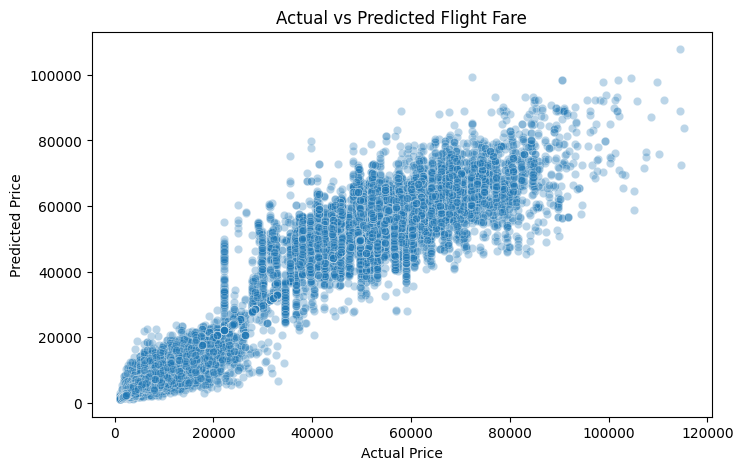

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=Y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Flight Fare")
plt.show()

##### Predictive System - 

In [29]:

airline_categories = ['AirAsia', 'AirIndia', 'GoFirst', 'Indigo', 'SpiceJet', 'Vistara']
city_categories = ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
time_categories = ['Early_Morning', 'Evening', 'Morning', 'Night']
stop_categories = ['zero', 'one', 'two_or_more']
class_categories = ['Economy', 'Business']

def show_options(options):
    for i, val in enumerate(options):
        print(f"{i + 1}. {val}")

print("Select the following flight details:")

print("\nAirline:")
show_options(airline_categories)
airline = airline_categories[int(input("Enter Airline ['AirAsia', 'AirIndia', 'GoFirst', 'Indigo', 'SpiceJet', 'Vistara']: ")) - 1]

print("\nSource City:")
show_options(city_categories)
source_city = city_categories[int(input("Enter Source City ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']: ")) - 1]

print("\nDeparture Time:")
show_options(time_categories)
departure_time = time_categories[int(input("Enter Departure Time ['Early_Morning', 'Evening', 'Morning', 'Night']: ")) - 1]

print("\nStops:")
show_options(stop_categories)
stops = stop_categories[int(input("Enter Stop choice ['zero', 'one', 'two_or_more'] : ")) - 1]

print("\nDestination City:")
show_options(city_categories)
destination_city = city_categories[int(input("Enter Destination City ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']: ")) - 1]

print("\nClass:")
show_options(class_categories)
flight_class = class_categories[int(input("Enter Class['Economy', 'Business']: ")) - 1]

days_left = int(input("\nDays left for departure: "))


Select the following flight details:

Airline:
1. AirAsia
2. AirIndia
3. GoFirst
4. Indigo
5. SpiceJet
6. Vistara

Source City:
1. Bangalore
2. Chennai
3. Delhi
4. Hyderabad
5. Kolkata
6. Mumbai

Departure Time:
1. Early_Morning
2. Evening
3. Morning
4. Night

Stops:
1. zero
2. one
3. two_or_more

Destination City:
1. Bangalore
2. Chennai
3. Delhi
4. Hyderabad
5. Kolkata
6. Mumbai

Class:
1. Economy
2. Business


In [30]:
input_data = pd.DataFrame([[airline, source_city, departure_time, destination_city]],columns=['airline', 'source_city', 'departure_time', 'destination_city'])
encoded_input_array = OHE.transform(input_data)
encoded_input_df = pd.DataFrame(encoded_input_array,columns=OHE.get_feature_names_out(['airline', 'source_city', 'departure_time', 'destination_city']),index=[0])

In [31]:
stops_encoded = ORE.transform([[stops]])[0][0]
class_encoded = ORE_class.transform([[flight_class]])[0][0]

final_input = pd.DataFrame([[stops_encoded, class_encoded, days_left]], columns=['stops', 'class', 'days_left'])
final_input = pd.concat([final_input, encoded_input_df], axis=1)

In [32]:
missing_cols = set(X.columns) - set(final_input.columns)
for col in missing_cols:
    final_input[col] = 0

final_input = final_input[X.columns]

predicted_price = LAR.predict(final_input)[0]
print(f"\n✈️ Estimated Flight Fare: ₹{round(predicted_price, 2)}")


✈️ Estimated Flight Fare: ₹43387.42
